# Proyek Analisis Data: Bike sharing
- **Nama:** Didin Roy Chafihudin
- **Email:** didincrypto@gmail.com
- **ID Dicoding:** didin_roy

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim, kondisi cuaca, dan waktu (jam) terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda pada function day, non-function day, weekend, dan holiday?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
#Import data dari file csv menggunakan pandas
bs_hour_df = pd.read_csv('data/hour.csv')
bs_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang dibutuhkan sudah tersedia pada dataset bike sharing hour.csv 
- Pada pertanyaan 1, kita membutuhkan beberapa data yaitu, season, weathersit, hr, dan cnt.
- Pada pertanyaan 2, kita membutuhkan beberapa data yaitu, weekday, holiday, working day, dan cnt.

### Assessing Data

In [11]:
#Cek Missing Value
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
#Cek Duplicate data
print("Jumlah duplikasi pada data hour.csv: ", bs_hour_df.duplicated().sum())

Jumlah duplikasi pada data hour.csv:  0


In [13]:
#Mengecek Invalid data dan Inacurate data
bs_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
bs_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada saat Assesing data, tidak menemukan adanya missing value, dan duplikasi data
- Data sudah cukup bersih, tidak ditemukan nya missing value, duplikasi data, inavlid data, maupun inacurate data.
- Kolom data perlu dirubah beberapa hal, diantaranya penamaan nya untuk memudahkan pembacaan data
  1. hr => hour
  2. dteday => date
  3. cnt => total
- Tipe data pada kolom dteday perlu di rubah menjadi datetime format.
- Tambah kolom baru yaitu weekend, didapat dari weekeday (0,6)
- Rubah data di kolom season, dan weathersit untuk memudahkan analisa
  1. Weathersit : Clear/Cloudy, Misty/Cloudy, Light Precipitation, Severe Weather 
  2. season: Spring, Summer, Fall, Winter
- Buat file baru yaitu berisi
  1. dteday => date
  2. hr => hour
  3. season & weathersit
  5. weekday, workingday, holiday,& weekend
  6. regitered & casual (Data penunjang jika diperlukan)
  7. cnt => total

### Cleaning Data

In [17]:
#Rubah nama kolom yang ada, untuk memudahkan pembacaan
bs_hour_df.rename(columns={
    'hr': 'hour',   
    'dteday': 'date', 
    'cnt': 'total'}, inplace=True)

In [18]:
#Rubah data tipe date menjadi datetime
bs_hour_df['date'] = pd.to_datetime(bs_hour_df['date'])  

In [19]:
# Tambahkan kolom 'weekend' menggunakan np.where
bs_hour_df['weekend'] = np.where(bs_hour_df['weekday'].isin([0, 6]), 1, 0) 
workingday_index = bs_hour_df.columns.get_loc('workingday') 
bs_hour_df.insert(workingday_index, 'weekend', bs_hour_df.pop('weekend')) 

In [20]:
#Mengganti data pada kolom season, dan waethersit untuk mempermudah analisis
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
weathersit_map = {
    1: 'Clear/Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Precipitation',
    4: 'Severe Weather'
}
# Menggunakan replace untuk mengganti nilai di kolom asli tanpa menambah kolom baru
bs_hour_df['season'] = bs_hour_df['season'].replace(season_map)
bs_hour_df['weathersit'] = bs_hour_df['weathersit'].replace(weathersit_map)

In [21]:
bs_hour_df.head()

,instant,date,season,yr,mnth,hour,holiday,weekday,weekend,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,1,0,0,6,1,0,Clear/Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,1,0,Clear/Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,1,0,Clear/Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,1,0,Clear/Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,1,0,Clear/Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   weekend     17379 non-null  int32         
 9   workingday  17379 non-null  int64         
 10  weathersit  17379 non-null  object        
 11  temp        17379 non-null  float64       
 12  atemp       17379 non-null  float64       
 13  hum         17379 non-null  float64       
 14  windspeed   17379 non-null  float64       
 15  casual      17379 non-null  int64         
 16  registered  17379 non-

**Insight:**
- Data sudah cukup clean, dan sudah siap untuk memasuki tahap Exploratory Data Analysis
- Data yang diperlukan untuk analisis yaitu
  1. dteday => date
  2. 
hr => hou
  3. season & weathersit
  4. weekday, workingday, holiday,& weekend
  5. regitered & casual (Data penunjang jika diperlukan)
  6. cnt => total total

## Exploratory Data Analysis (EDA)

### Expolorasi Data bike sharing
- Hal yang pertama perlu kita lakukan adalah membuah file baru yang mencangkup 6 kolom yang diperlukan

In [26]:
#Buat tabel baru
df = bs_hour_df[['date', 'hour', 'season', 'weathersit', 'weekday', 'workingday', 'holiday', 'weekend', 'registered', 'casual', 'total']]
df.head()

,date,hour,season,weathersit,weekday,workingday,holiday,weekend,registered,casual,total
0,2011-01-01,0,Spring,Clear/Cloudy,6,0,0,1,13,3,16
1,2011-01-01,1,Spring,Clear/Cloudy,6,0,0,1,32,8,40
2,2011-01-01,2,Spring,Clear/Cloudy,6,0,0,1,27,5,32
3,2011-01-01,3,Spring,Clear/Cloudy,6,0,0,1,10,3,13
4,2011-01-01,4,Spring,Clear/Cloudy,6,0,0,1,1,0,1


**Pertanyaan 1**
1. Kelompokan jumlah bike sharing, berdasarkan :
    - Season
    - Weathersit 
    - hour

In [28]:
#Identifikasi demografi bike sharing berdasarkan season
df.groupby(by="season").agg({ 
    "casual": ["max", "min", "mean","sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                        registered                         total  \
          max min       mean     sum        max min        mean     sum   max   
season                                                                          
Fall      350   0  50.287144  226091        886   0  185.729093  835038   977   
Spring    367   0  14.290901   60622        681   0   96.823668  410726   801   
Summer    361   0  46.160581  203522        782   0  162.183488  715067   957   
Winter    362   0  30.666824  129782        876   0  168.202032  711831   967   

                                 
       min        mean      sum  
season                           
Fall     1  236.016237  1061129  
Spring   1  111.114569   471348  
Summer   1  208.344069   918589  
Winter   1  198.868856   841613

In [29]:
# Menghitung total dan rata-rata bike sharing berdasarkan season
season_sum = df.groupby(by="season")['total'].sum().reset_index()
season_hourly_sum = df.groupby(['hour', 'season'])['total'].sum().reset_index()
season_hourly_avg = df.groupby(['hour', 'season'])['total'].mean().reset_index()
print("Total by Season:", season_sum) 
print("Total by Season in hourly:", season_hourly_sum) 
print("Avarage by Season in hourly:", season_hourly_avg) 

Total by Season:    season    total
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613
Total by Season in hourly:     hour  season  total
0      0    Fall  13822
1      0  Spring   4878
2      0  Summer  10459
3      0  Winter   9971
4      1    Fall   8132
..   ...     ...    ...
91    22  Winter  21871
92    23    Fall  22986
93    23  Spring   7994
94    23  Summer  17661
95    23  Winter  15300

[96 rows x 3 columns]
Avarage by Season in hourly:     hour  season       total
0      0    Fall   73.914439
1      0  Spring   27.404494
2      0  Summer   56.842391
3      0  Winter   56.333333
4      1    Fall   43.720430
..   ...     ...         ...
91    22  Winter  123.564972
92    23    Fall  122.919786
93    23  Spring   44.411111
94    23  Summer   95.983696
95    23  Winter   86.440678

[96 rows x 3 columns]


In [30]:
#Identifikasi demografi bike sharing berdasarkan weathersit
df.groupby(by="weathersit").agg({ 
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                        registered                  \
                       max min       mean     sum        max min        mean   
weathersit                                                                     
Clear/Cloudy           367   0  40.545431  462745        886   0  164.323841   
Light Precipitation    263   0  16.055673   22783        791   0   95.523608   
Misty/Cloudy           350   0  29.595290  134481        822   0  145.570202   
Severe Weather           6   1   2.666667       8        158  22   71.666667   

                             total                           
                         sum   max min        mean      sum  
weathersit                                                   
Clear/Cloudy         1875428   977   1  204.869272  2338173  
Light Precipitation   135548   891   1  111.579281   158331  
Misty/Cloudy          661471   957   1  175.165493   795952  
Severe Weather           215   164  23   74.333333      223

In [31]:
# Menghitung total dan rata-rata bike sharing berdasarkan weathersit
weather_sum = df.groupby(by="weathersit")['total'].sum()
weather_hourly_sum = df.groupby(['hour','weathersit'])['total'].sum().reset_index()
weather_hourly_avg = df.groupby(['hour', 'weathersit'])['total'].mean().reset_index()
print("Total by Weathersit:", weather_sum)  
print("Total by Weathersit in hourly:", weather_hourly_sum)  
print("Avarage by Weathersit in hourly:", weather_hourly_avg)  

Total by Weathersit: weathersit
Clear/Cloudy           2338173
Light Precipitation     158331
Misty/Cloudy            795952
Severe Weather             223
Name: total, dtype: int64
Total by Weathersit in hourly:     hour           weathersit  total
0      0         Clear/Cloudy  28930
1      0  Light Precipitation   1462
2      0         Misty/Cloudy   8738
3      1         Clear/Cloudy  16854
4      1  Light Precipitation    925
..   ...                  ...    ...
70    22  Light Precipitation   3869
71    22         Misty/Cloudy  19159
72    23         Clear/Cloudy  46239
73    23  Light Precipitation   3308
74    23         Misty/Cloudy  14394

[75 rows x 3 columns]
Avarage by Weathersit in hourly:     hour           weathersit       total
0      0         Clear/Cloudy   59.161554
1      0  Light Precipitation   28.115385
2      0         Misty/Cloudy   47.232432
3      1         Clear/Cloudy   34.395918
4      1  Light Precipitation   17.129630
..   ...                  ...      

In [32]:
#Identifikasi demografi bike sharing berdasarkan season dan weathersit
df.groupby(by=["season", "weathersit"]).agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                        registered      \
                              max min       mean     sum        max min   
season weathersit                                                         
Fall   Clear/Cloudy           327   0  53.053049  174014        886   0   
       Light Precipitation    263   0  36.159851    9727        786   0   
       Misty/Cloudy           350   0  44.720169   42350        751   1   
Spring Clear/Cloudy           367   0  16.683677   44462        681   0   
       Light Precipitation     31   0   3.772358    1392        505   0   
       Misty/Cloudy           226   0  12.248963   14760        623   0   
       Severe Weather           6   1   2.666667       8        158  22   
Summer Clear/Cloudy           361   0  52.884575  151197        782   0   
       Light Precipitation    241   0  18.258621    7413        688   0   
       Misty/Cloudy           311   0  39.258741   44912        726   0   
Winter Clear/Cloudy           362   0  35.673438   93072        876   0   
       Light Precipitation    131   0  11.336000    4251        791   1   
       Misty/Cloudy           310   0  26.008814   32459        822   1   

                                               total                          
                                  mean     sum   max min        mean     sum  
season weathersit                                                             
Fall   Clear/Cloudy         191.441159  627927   977   1  244.494207  801941  
       Light Precipitation  135.795539   36529   891   1  171.955390   46256  
       Misty/Cloudy         180.128828  170582   868   2  224.848997  212932  
Spring Clear/Cloudy         105.371857  280816   801   1  122.055535  325278  
       Light Precipitation   54.878049   20250   520   1   58.650407   21642  
       Misty/Cloudy          90.825726  109445   712   1  103.074689  124205  
       Severe Weather        71.666667     215   164  23   74.333333     223  
Summer Clear/Cloudy         179.526408  513266   873   1  232.410983  664463  
       Light Precipitation   96.921182   39350   782   1  115.179803   46763  
       Misty/Cloudy         142.002622  162451   957   1  181.261364  207363  
Winter Clear/Cloudy         173.790341  453419   967   1  209.463779  546491  
       Light Precipitation  105.117333   39419   856   1  116.453333   43670  
       Misty/Cloudy         175.475160  218993   905   1  201.483974  251452

**Pertanyaan 2**
1. Kelompokan jumlah bike sharing, berdasarkan :
    - function day {workingday}
    - non-function day {weekend+holiday}
    - weekend
    - holiday

In [34]:
# Mendefinisikan mapping untuk workingday dan weathersit tanpa mereplace nya!
function_day_map = {
    0:'Non-Function day',
    1:'Fucntion day'
}  
#Identifikasi demografi bike sharing berdasarkan function day dan non- function day
df.groupby(df['workingday'].replace(function_day_map)).agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                        registered                  \
                    max min       mean     sum        max min        mean   
workingday                                                                  
Fucntion day        264   0  25.561315  303285        886   0  167.646439   
Non-Function day    367   0  57.441422  316732        601   0  123.963910   

                          total                           
                      sum   max min        mean      sum  
workingday                                                
Fucntion day      1989125   977   1  193.207754  2292410  
Non-Function day   683537   783   1  181.405332  1000269

In [35]:
# Menghitung total dan rata-rata bike sharing selama function dan non-function day
funct_sum = df.groupby(by="workingday")['total'].sum().reset_index()
funct_day_avg = df.groupby(['hour','workingday'])['total'].mean().reset_index()
funct_day_sum = df.groupby(['hour','workingday'])['total'].sum().reset_index()
print(funct_sum)

   workingday    total
0           0  1000269
1           1  2292410


In [36]:
#Identifikasi demografi bike sharing selama weekend
df.groupby(by="weekend").agg({ 
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
}).loc[1]

casual      max        367.000000
            min          0.000000
            mean        58.710211
            sum     294373.000000
registered  max        526.000000
            min          0.000000
            mean       125.141803
            sum     627461.000000
total       max        783.000000
            min          1.000000
            mean       183.852014
            sum     921834.000000
Name: 1, dtype: float64

In [37]:
# Menghitung total dan rata-rata bike sharing selama holiday dan weekend
holiday_hourly_avg = df.groupby(['hour','holiday'])['total'].mean().reset_index()
holiday_hourly_sum = df.groupby(['hour','holiday'])['total'].sum().reset_index()
holiday_sum = df.groupby(by="holiday")['total'].sum().reset_index()
weekend_hourly_avg = df.groupby(['hour','weekend'])['total'].mean().reset_index()
weekend_hourly_sum = df.groupby(['hour','weekend'])['total'].sum().reset_index()
weekend_sum = df.groupby(by="weekend")['total'].sum().reset_index()

# Menghitung rata-rata bike sharing selama holiday dan weekend berdasarkan jenis pengguna
holiday_user_avg = df.groupby(['hour', 'holiday'])[['casual', 'registered', 'total']].mean().reset_index()
weekend_user_avg = df.groupby(['hour', 'weekend'])[['casual', 'registered', 'total']].mean().reset_index()
holiday_user_sum = df.groupby(['holiday'])[['casual', 'registered', 'total']].sum().reset_index()
weekend_user_sum = df.groupby(['weekend'])[['casual', 'registered', 'total']].sum().reset_index()

print(holiday_sum)
print(weekend_sum)
print(holiday_user_sum)
print(weekend_user_sum)

   holiday    total
0        0  3214244
1        1    78435
   weekend    total
0        0  2370845
1        1   921834
   holiday  casual  registered    total
0        0  597658     2616586  3214244
1        1   22359       56076    78435
   weekend  casual  registered    total
0        0  325644     2045201  2370845
1        1  294373      627461   921834


In [38]:
#Identifikasi demografi bike sharing selama holiday
df.groupby(by="holiday").agg({ 
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
}).loc[1]

casual      max       272.000
            min         0.000
            mean       44.718
            sum     22359.000
registered  max       601.000
            min         0.000
            mean      112.152
            sum     56076.000
total       max       712.000
            min         1.000
            mean      156.870
            sum     78435.000
Name: 1, dtype: float64

In [39]:
df.to_csv("all_data.csv", index=False)

**Insight:**
- Pada spring season bike sharing mengalami penurunan, dan peak dari bike sharing ada di fall season
- Cuaca memiliki pengaruh lebih signifikan terhadap jumlah bike sharing, terutama pada cuaca badai (Severe Weather) yang terjadi pada spring season. Hanya memiliki beberapa data bike sharing
- Pola data total bike sharing cukup seragam untuk per hour baik berdasarkan season, dan weathersit
- Rasio pengguna casul naik disaat weekend ataupun holiday, dibanding dengan working day
- Kenaikan rasio bike sharing saat holiday/function day, dibanding dengan working day

## Visualization & Explanatory Analysis

### Pertanyaan 1:

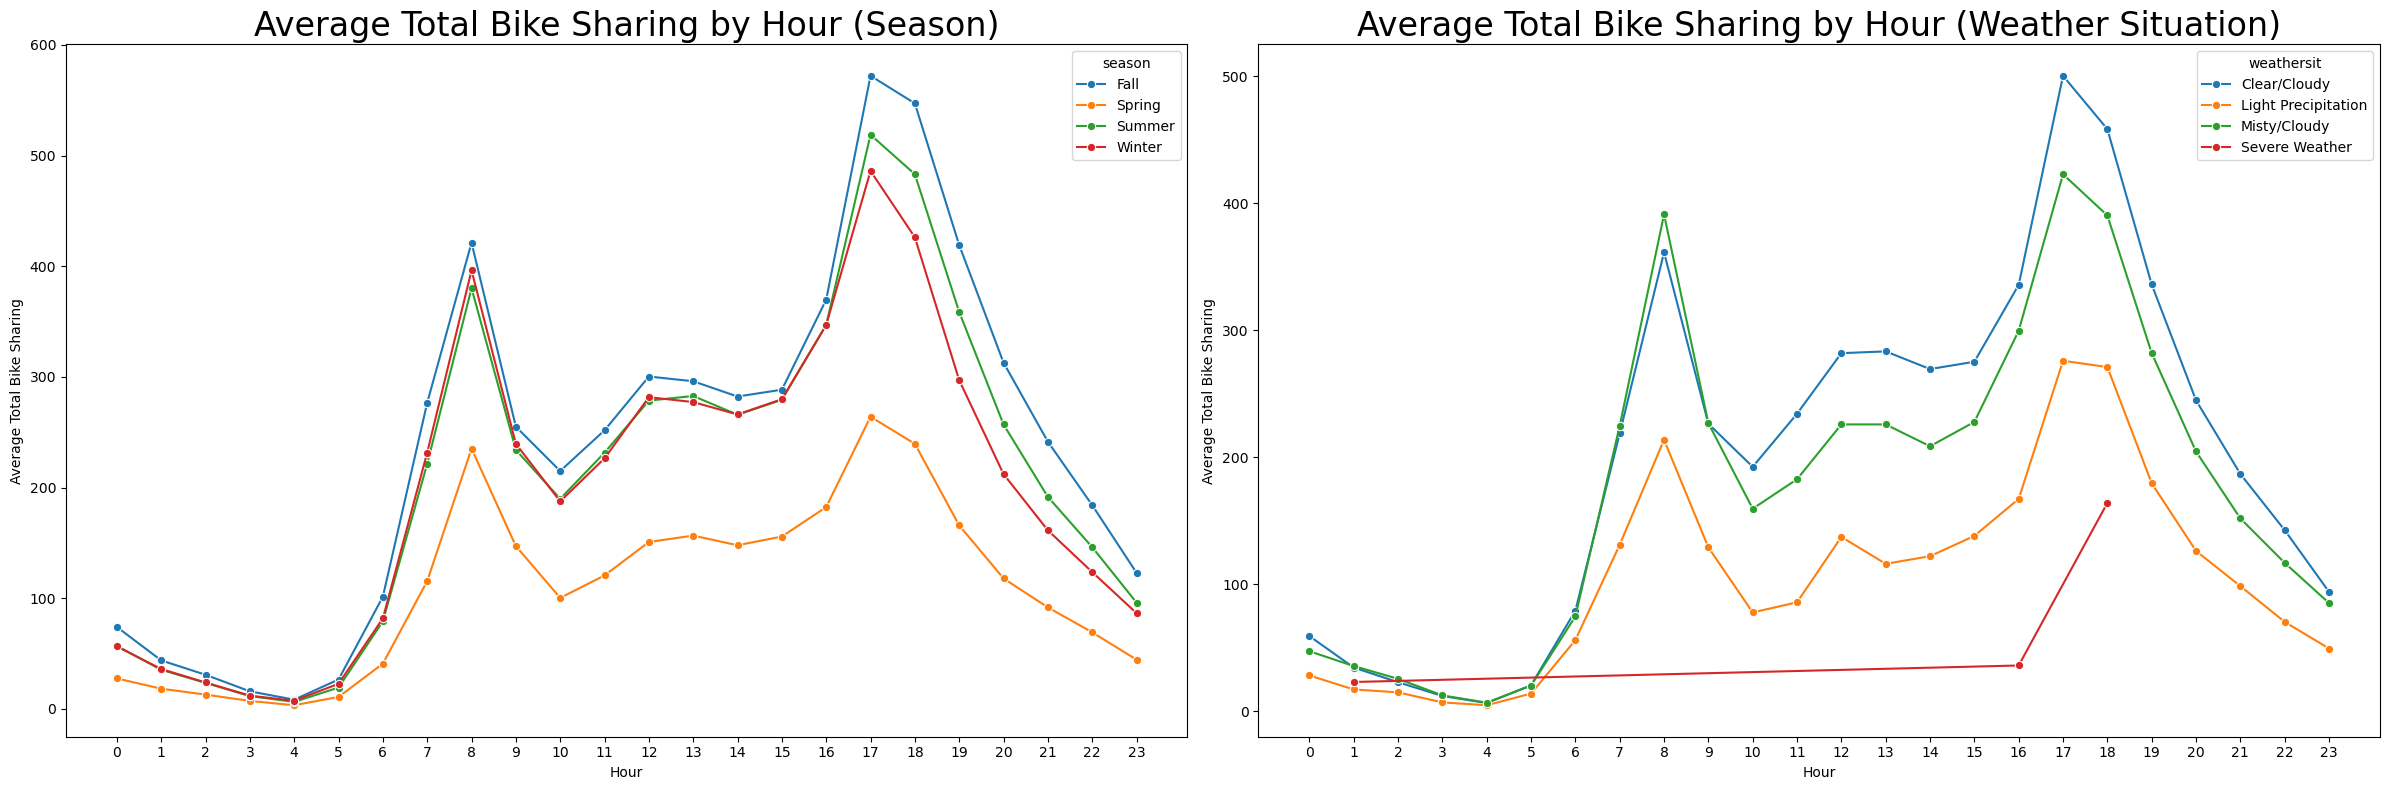

In [43]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Lineplot berdasarkan Season
sns.lineplot(data=season_hourly_avg, x='hour', y='total', hue='season',marker ='o',palette ="tab10", ax=ax[0])
ax[0].set_title('Average Total Bike Sharing by Hour (Season)', fontsize=24)
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Average Total Bike Sharing') 
ax[0].set_xticks(range(0,24))

# Lineplot berdasarkan Weathersit
sns.lineplot(data=weather_hourly_avg, x='hour', y='total', hue='weathersit',marker ='o',palette ="tab10", ax=ax[1])
ax[1].set_title('Average Total Bike Sharing by Hour (Weather Situation)', fontsize=24)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Average Total Bike Sharing')
ax[1].set_xticks(range(0,24)) 

# Tampilkan plot
plt.tight_layout()
plt.show()


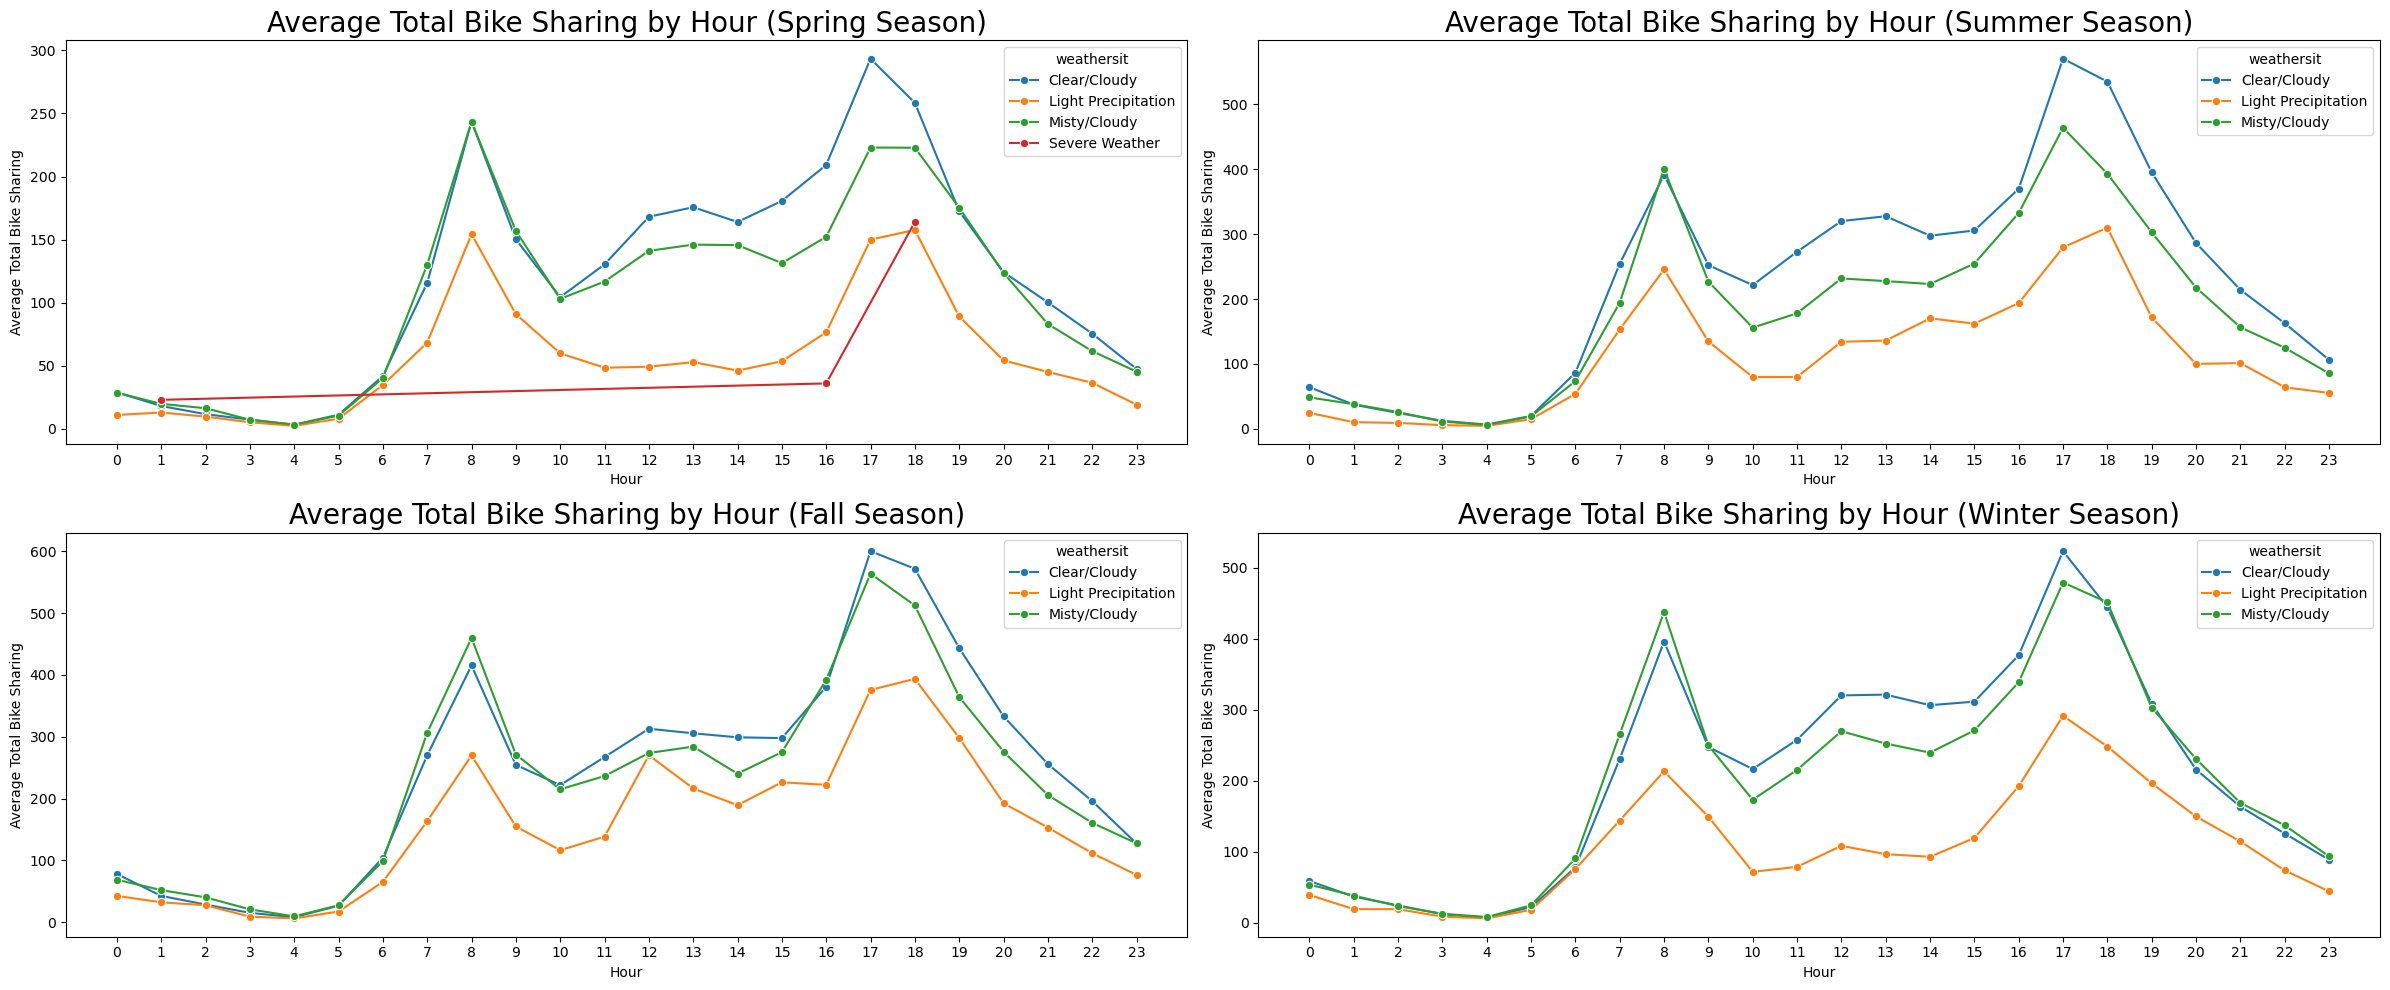

In [44]:
df_avg = df.groupby(['hour', 'weathersit', 'season'])['total'].mean().reset_index() 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))

# Plot untuk Spring Season (season=1)
sns.lineplot(data=df_avg[df_avg['season'] == 'Spring'], x='hour', y='total', hue='weathersit', marker='o',palette ="tab10", ax=ax[0, 0])
ax[0, 0].set_title('Average Total Bike Sharing by Hour (Spring Season)', fontsize=20)
ax[0, 0].set_xlabel('Hour')
ax[0, 0].set_ylabel('Average Total Bike Sharing')
ax[0, 0].set_xticks(range(0, 24))

# Plot untuk Summer Season (season=2)
sns.lineplot(data=df_avg[df_avg['season'] == 'Summer'], x='hour', y='total', hue='weathersit', marker='o',palette ="tab10", ax=ax[0, 1])
ax[0, 1].set_title('Average Total Bike Sharing by Hour (Summer Season)', fontsize=20)
ax[0, 1].set_xlabel('Hour')
ax[0, 1].set_ylabel('Average Total Bike Sharing')
ax[0, 1].set_xticks(range(0, 24))

# Plot untuk Fall Season (season=3)
sns.lineplot(data=df_avg[df_avg['season'] == 'Fall'], x='hour', y='total', hue='weathersit', marker='o',palette ="tab10", ax=ax[1, 0])
ax[1, 0].set_title('Average Total Bike Sharing by Hour (Fall Season)', fontsize=20)
ax[1, 0].set_xlabel('Hour')
ax[1, 0].set_ylabel('Average Total Bike Sharing')
ax[1, 0].set_xticks(range(0, 24))

# Plot untuk Winter Season (season=4)
sns.lineplot(data=df_avg[df_avg['season'] == 'Winter'], x='hour', y='total', hue='weathersit', marker='o',palette ="tab10", ax=ax[1, 1])
ax[1, 1].set_title('Average Total Bike Sharing by Hour (Winter Season)', fontsize=20)
ax[1, 1].set_xlabel('Hour')
ax[1, 1].set_ylabel('Average Total Bike Sharing')
ax[1, 1].set_xticks(range(0, 24))

# Menyusun layout agar rapi dan menampilkan plot
plt.tight_layout()
plt.show()

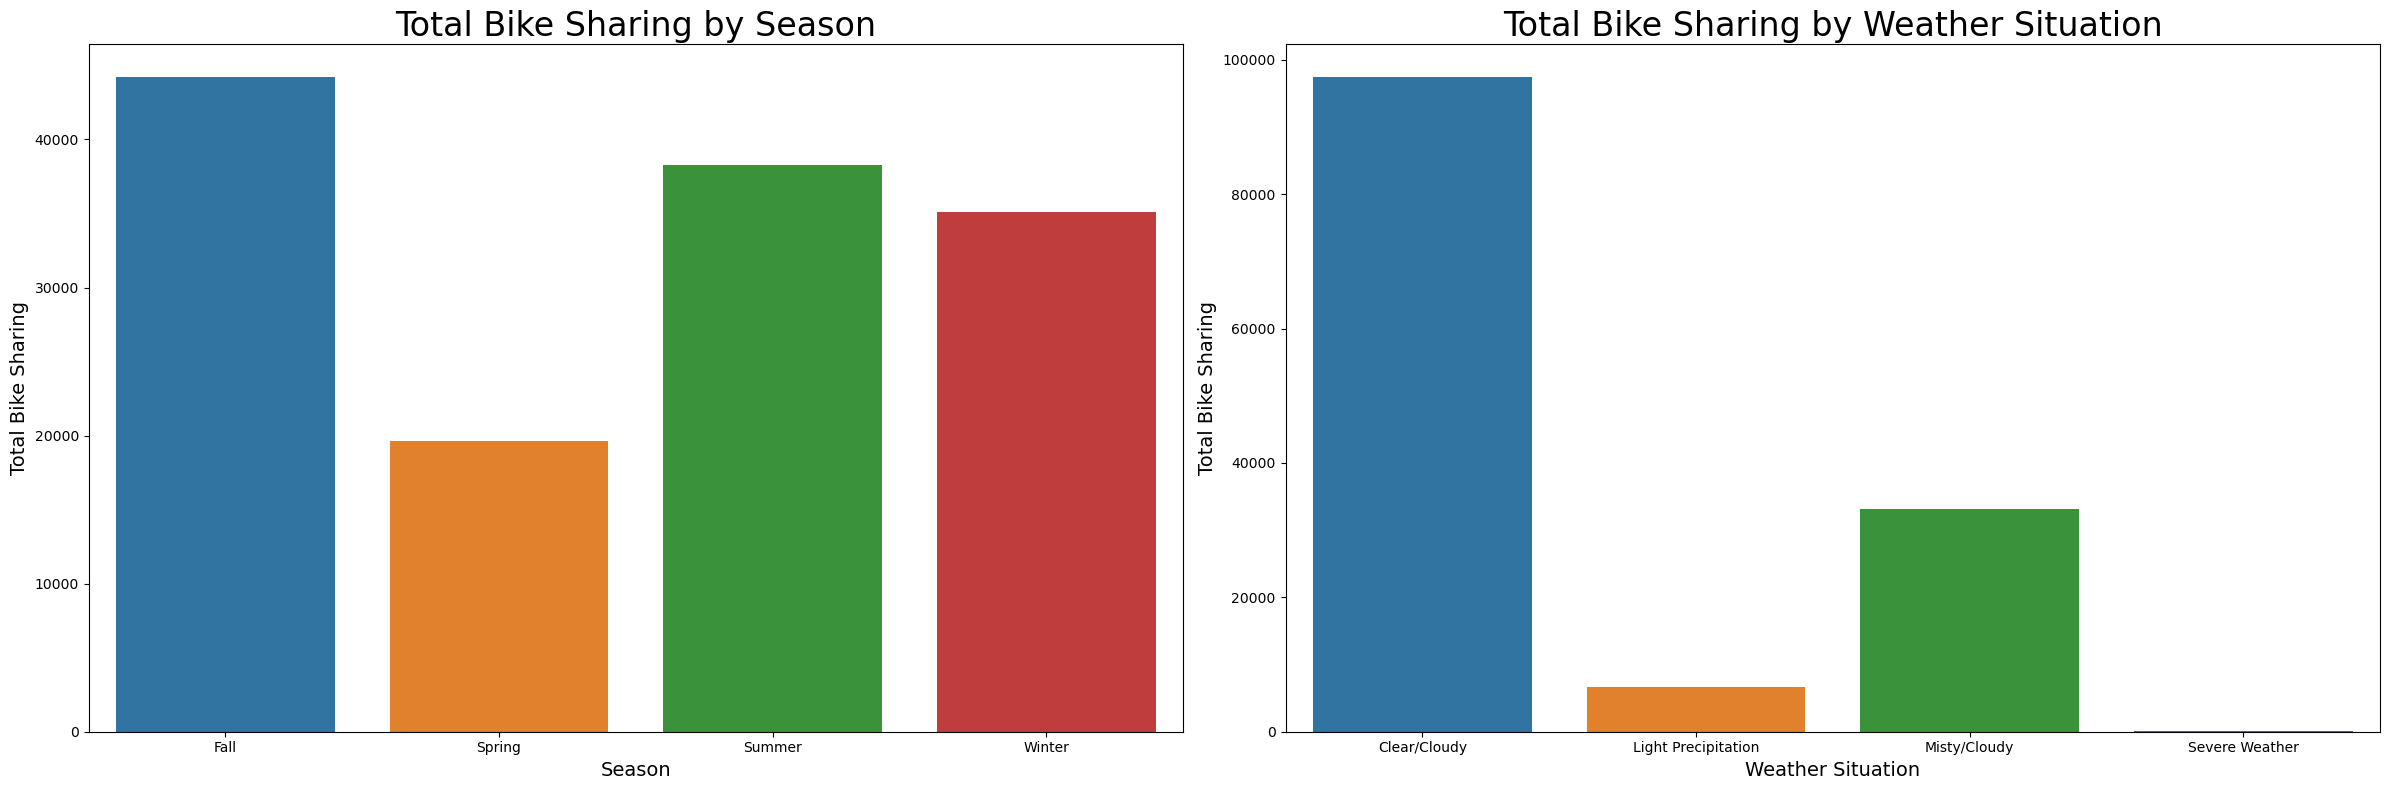

In [45]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

sns.barplot(data=season_hourly_sum, x='season', y='total', hue='season', palette="tab10", ax=ax[0], errorbar=None)
ax[0].set_title('Total Bike Sharing by Season', fontsize=24)
ax[0].set_xlabel('Season', fontsize=14)
ax[0].set_ylabel('Total Bike Sharing', fontsize=14)

# Barplot berdasarkan Weathersit
sns.barplot(data=weather_hourly_sum, x='weathersit', y='total',  hue='weathersit',palette="tab10", ax=ax[1], errorbar=None)
ax[1].set_title('Total Bike Sharing by Weather Situation', fontsize=24)
ax[1].set_xlabel('Weather Situation', fontsize=14)
ax[1].set_ylabel('Total Bike Sharing', fontsize=14)

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Terjadi penggurangan rata-rata bike sharing pada Spring season, dan peak bike sharing pada fall season
- Berdasarkan jam, peak bike sharing terjadi saat jam aktifitas kantor atau sekolah. Yaitu mulai jam 6 hingga 9 lalu pada sore hari jam 16 hingga 19.
- Data pada cuaca badai terlalu sedikit untuk menyimpulkan, namun bisa disebutkan bahwa saat badai. Orang akan memilih opsi kendaraan lain dari pada bike sharing
- Kesimpulan nya adalah, Ya!. Season, Weatherist, dan hour mempengaruhi bike sharing

### Pertanyaan 2:

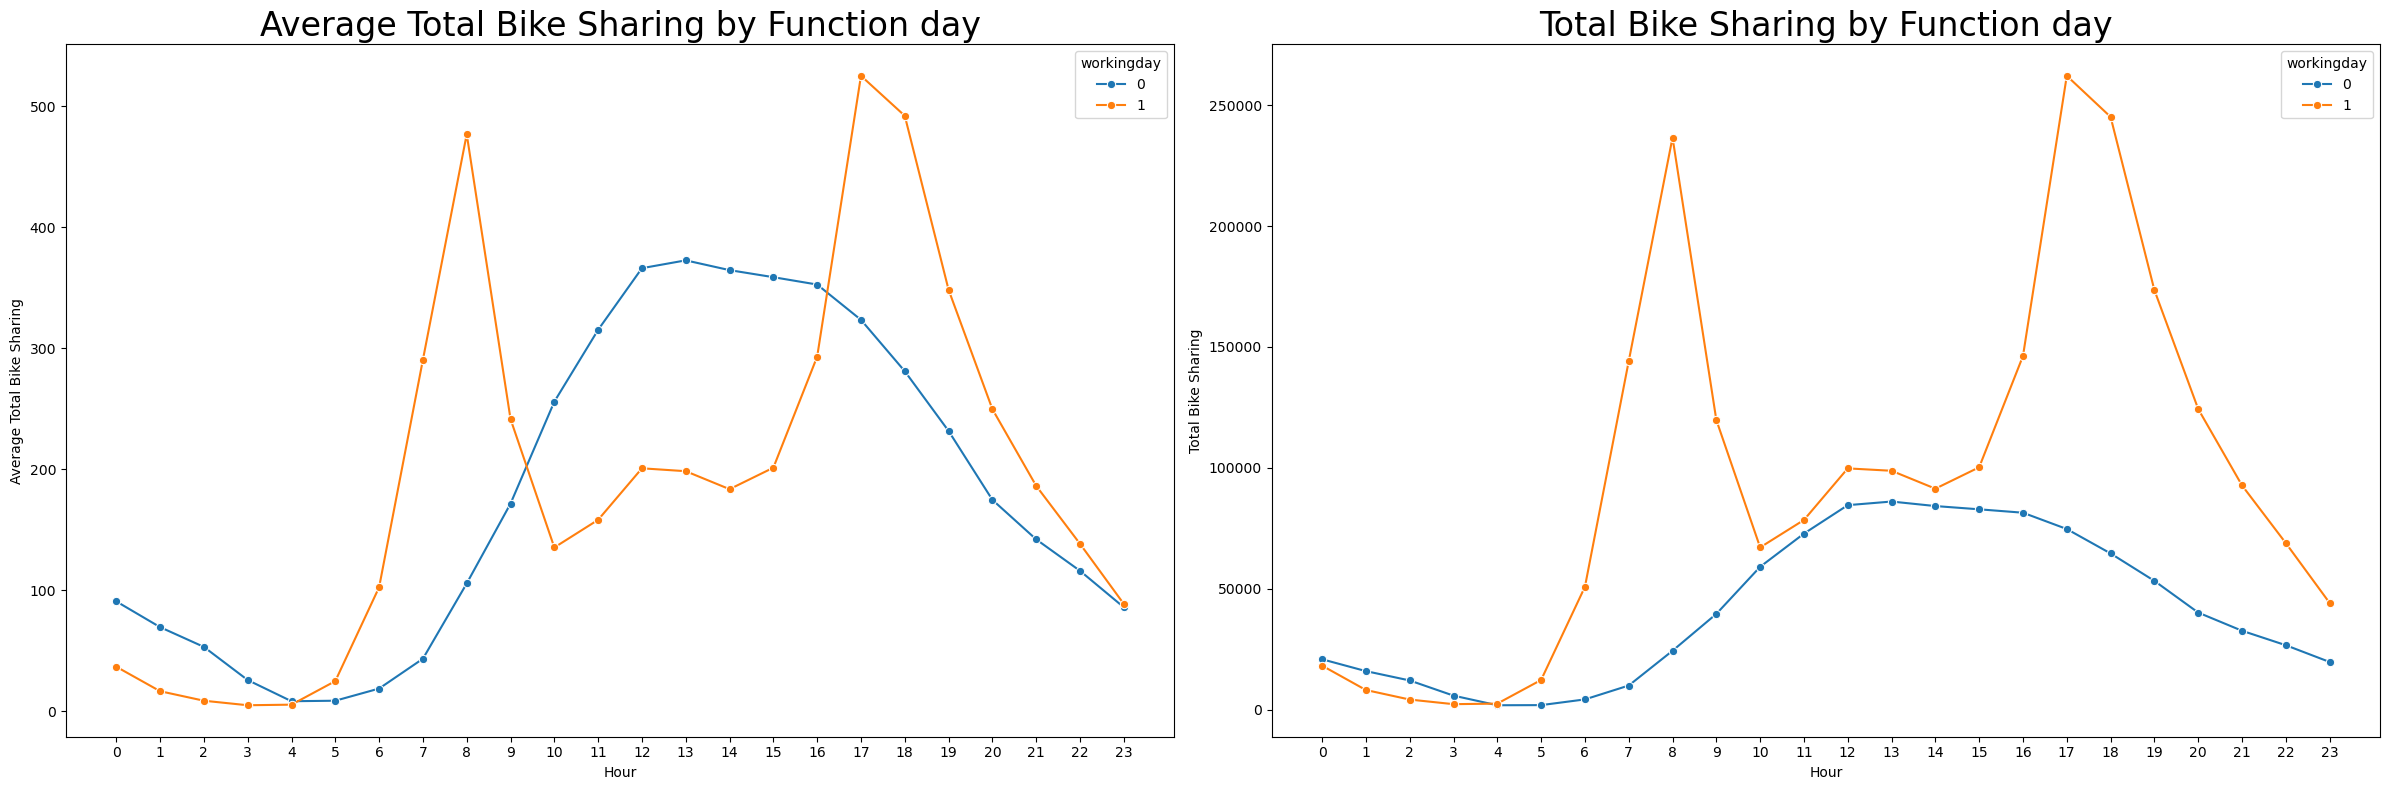

In [48]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Lineplot berdasarkan function day
sns.lineplot(data=funct_day_avg, x='hour', y='total', hue='workingday',marker ='o',palette ="tab10", ax=ax[0])
ax[0].set_title('Average Total Bike Sharing by Function day', fontsize=24)
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Average Total Bike Sharing') 
ax[0].set_xticks(range(0,24))

# Lineplot berdasarkan Non-Function
sns.lineplot(data=funct_day_sum, x='hour', y='total', hue='workingday',marker ='o',palette ="tab10", ax=ax[1])
ax[1].set_title('Total Bike Sharing by Function day', fontsize=24)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total Bike Sharing')
ax[1].set_xticks(range(0,24)) 

# Tampilkan plot
plt.tight_layout()
plt.show()

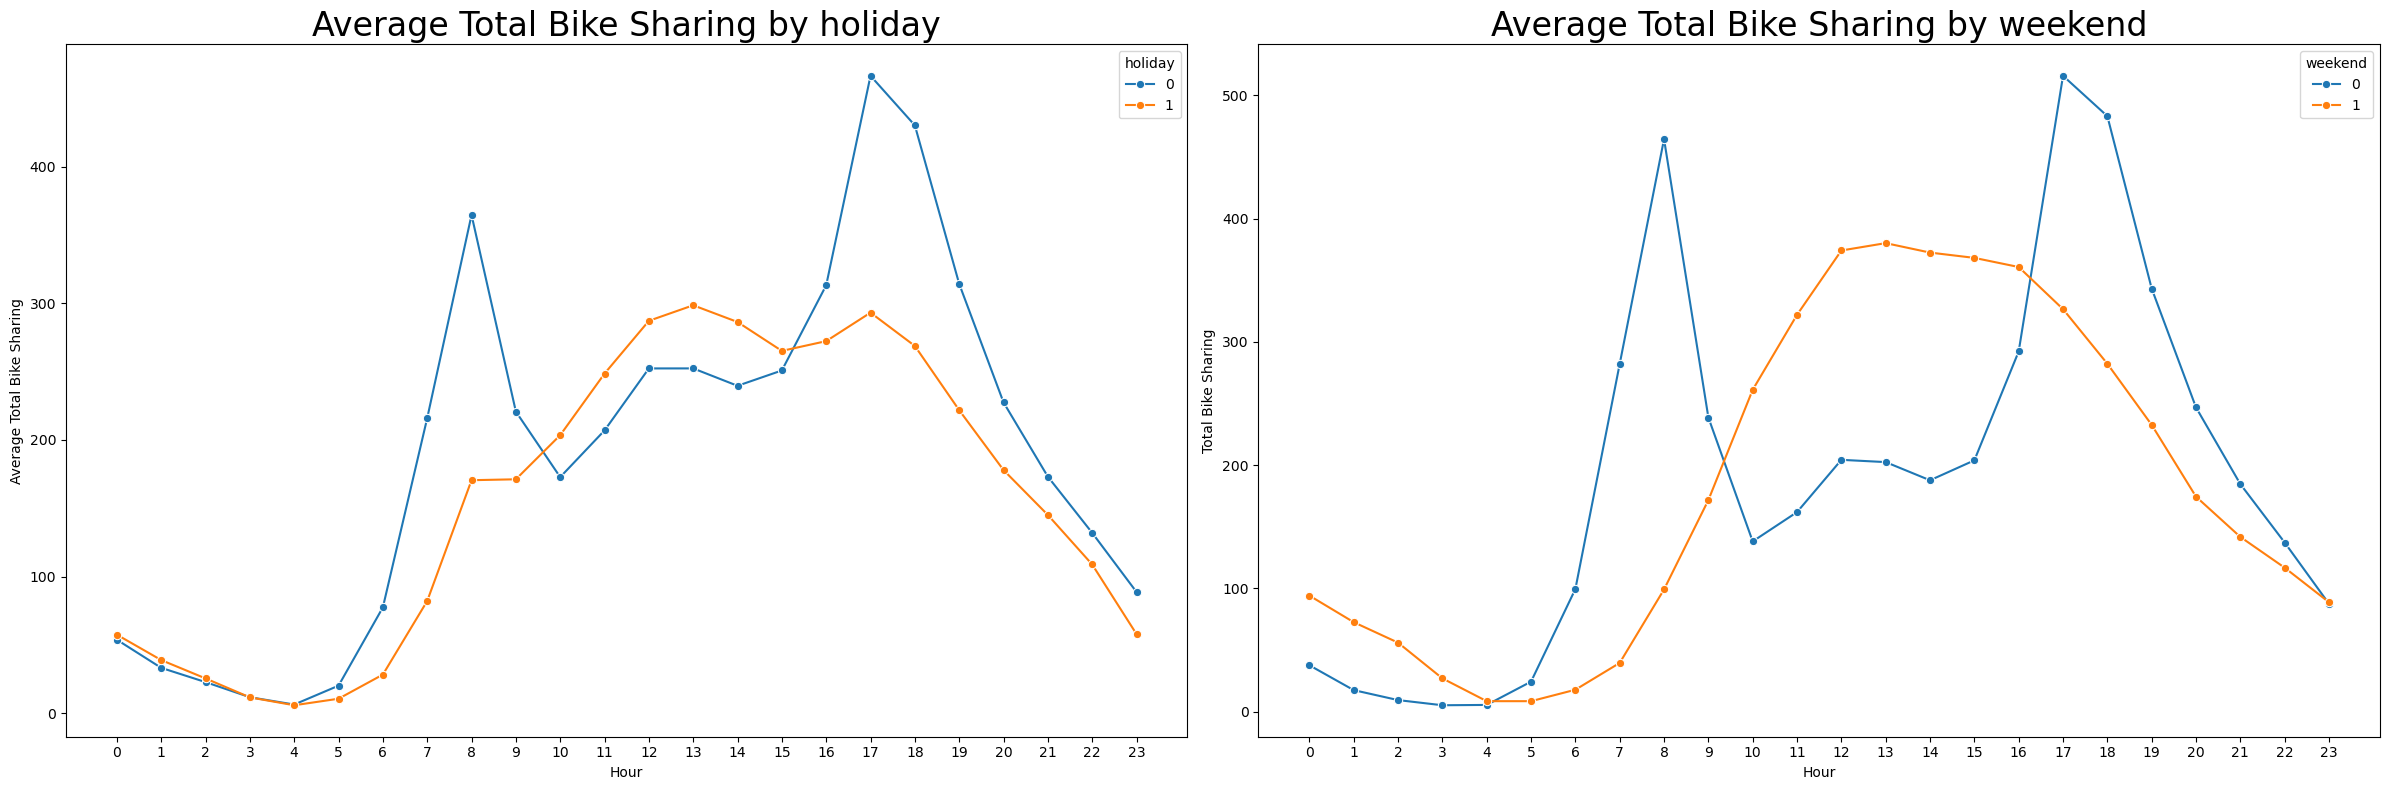

In [49]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Lineplot berdasarkan holiday
sns.lineplot(data=holiday_hourly_avg, x='hour', y='total', hue='holiday',marker ='o',palette ="tab10", ax=ax[0])
ax[0].set_title('Average Total Bike Sharing by holiday', fontsize=24)
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Average Total Bike Sharing') 
ax[0].set_xticks(range(0,24))

# Lineplot berdasarkan weekend
sns.lineplot(data=weekend_hourly_avg, x='hour', y='total', hue= 'weekend' ,marker ='o',palette ="tab10", ax=ax[1],errorbar=None)
ax[1].set_title('Average Total Bike Sharing by weekend', fontsize=24)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total Bike Sharing')
ax[1].set_xticks(range(0,24)) 

# Tampilkan plot
plt.tight_layout()
plt.show()

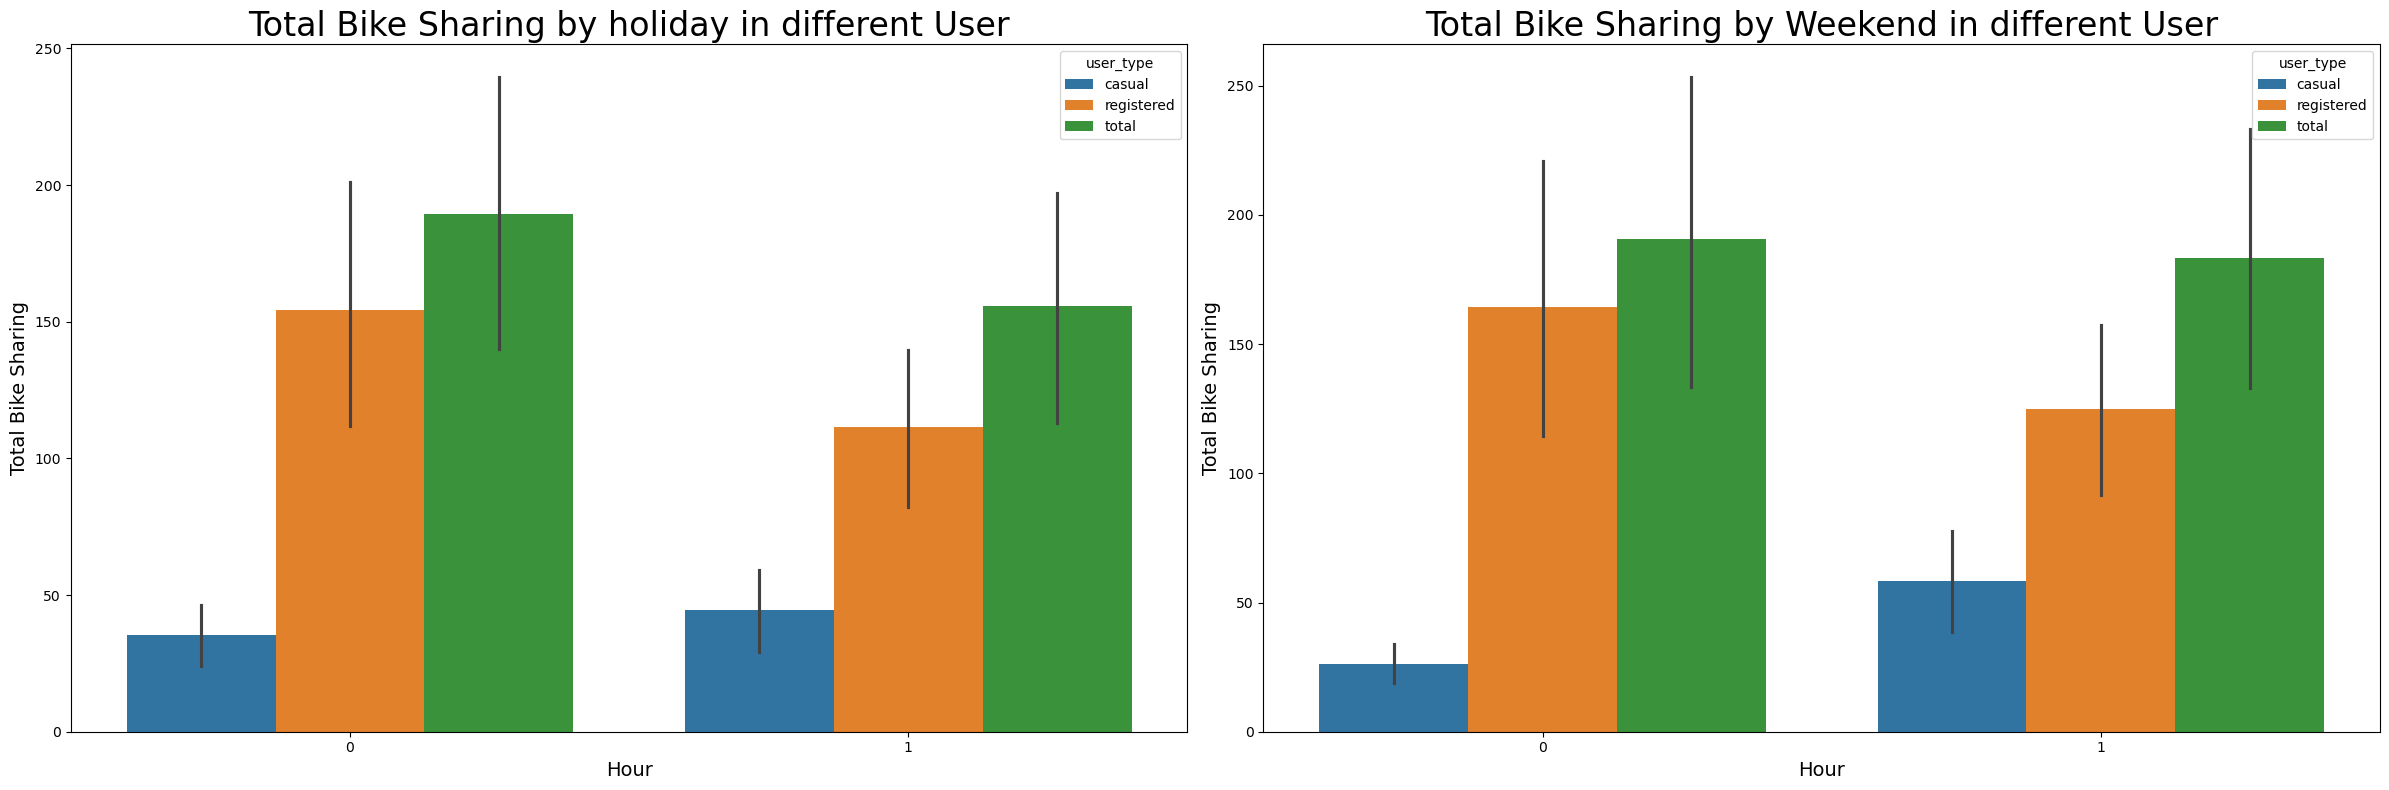

In [50]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Barplot berdasarkan holiday
sns.barplot(data=holiday_user_avg.melt(id_vars=['hour', 'holiday'], 
                                          value_vars=['casual', 'registered', 'total'], 
                                          var_name='user_type', 
                                          value_name='count'), 
            x='holiday', y='count', hue='user_type', palette="tab10", ax=ax[0])
ax[0].set_title('Total Bike Sharing by holiday in different User', fontsize=24)
ax[0].set_xlabel('Hour', fontsize=14)
ax[0].set_ylabel('Total Bike Sharing', fontsize=14)

# Barplot berdasarkan weekend
sns.barplot(data=weekend_user_avg.melt(id_vars=['hour', 'weekend'], 
                                          value_vars=['casual', 'registered', 'total'], 
                                          var_name='user_type', 
                                          value_name='count'), 
            x='weekend', y='count', hue='user_type', palette="tab10", ax=ax[1])
ax[1].set_title('Total Bike Sharing by Weekend in different User', fontsize=24)
ax[1].set_xlabel('Hour', fontsize=14)
ax[1].set_ylabel('Total Bike Sharing', fontsize=14)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Pada Function day/Working day bike sharing mengalami peak di jam-jam masuk dan pulang dari bekerja maupun sekolah.
- Pada Non-Function day (holiday dan weekend), peak terjadi saat siang hari.
- Rasio dari user casual naik saat Non-function day. Bisa disimpulkan bahwa user casual lebih aktif pada saat Non- Function day
- Kesimpulan nya, Ya!. Ada pengaruh Function dan non-Function day. Pengaruh nya lebih ke jam peak bike sharing, dimana saat function day peak terjadi pada saat jam berangkat dan pulang kerja/sekolah, dan Non-Function day terjadi pada saat siang-sore hari

## Conclusion

- Musim mempengaruhi jumlah penyewaan sepeda, dengan penurunan rata-rata pada musim Spring dan puncak penyewaan pada musim Fall. Selain itu, kondisi cuaca yang buruk seperti badai mengurangi minat pengguna untuk menyewa sepeda, sementara puncak penyewaan terjadi antara jam 6 hingga 9 pagi dan jam 16 hingga 19 sore, yang menunjukkan pengguna cenderung menggunakan sepeda untuk keperluan transportasi harian.
- Pada Function Day, penyewaan sepeda mencapai puncak saat jam-jam masuk dan pulang kerja/school, sementara pada Non-Function Day (holiday dan weekend), puncak penyewaan terjadi saat siang hari. Pengguna casual menunjukkan aktivitas yang lebih tinggi pada hari libur, mengindikasikan bahwa mereka lebih cenderung menyewa sepeda untuk rekreasi atau aktivitas santai.